In [3]:
#Llamar al dataloader
%run DataLoader.ipynb
!pip install langdetect

In [5]:
from langdetect import detect

In [2]:
dataset.head(5)

,keyword,location,text,target,longitud
id,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True,69
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True,38
5,NaN,NaN,All residents asked to 'shelter in place' are ...,True,133
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True,65
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88


In [6]:
detect("Ein, zwei, drei, vier")


'de'

In [34]:
dataset_test = dataset
dataset_test['Idioma'] = dataset_test.text.apply(lambda x : detect(x))
dataset_test

,text,Idioma
id,,
1,Our Deeds are the Reason of this #earthquake M...,en
4,Forest fire near La Ronge Sask. Canada,en
5,All residents asked to 'shelter in place' are ...,en
6,"13,000 people receive #wildfires evacuation or...",en
7,Just got sent this photo from Ruby #Alaska as ...,en
...,...,...
10869,Two giant cranes holding a bridge collapse int...,en
10870,@aria_ahrary @TheTawniest The out of control w...,en
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,en


In [35]:
dataset_test[['text','Idioma']]

,text,Idioma
id,,
1,Our Deeds are the Reason of this #earthquake M...,en
4,Forest fire near La Ronge Sask. Canada,en
5,All residents asked to 'shelter in place' are ...,en
6,"13,000 people receive #wildfires evacuation or...",en
7,Just got sent this photo from Ruby #Alaska as ...,en
...,...,...
10869,Two giant cranes holding a bridge collapse int...,en
10870,@aria_ahrary @TheTawniest The out of control w...,en
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,en


In [31]:
language_count = dataset_test.groupby('Idioma').agg({'target':'count'}).reset_index()
language_count.columns= ['Idioma','Cantidad']
language_count.nlargest(10,'Cantidad')

,Idioma,Cantidad
5,en,7321
4,de,58
0,af,23
1,ca,23
12,it,20
9,fr,19
3,da,18
15,no,16
14,nl,15
7,et,12


Text(0.5, 1.0, 'Análisis del los idiomas más frecuentes')

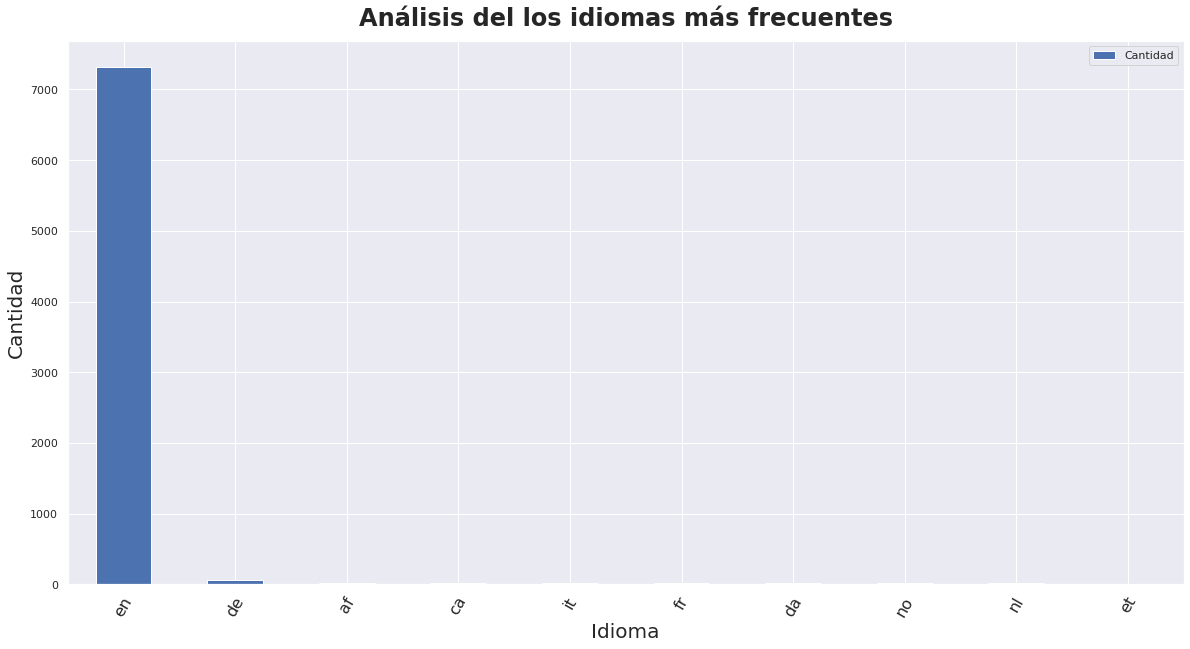

In [41]:
fig, ax = plt.subplots()

language_count.nlargest(10,'Cantidad').plot(kind='bar', x = 'Idioma', ax = ax)

plt.xlabel("Idioma",fontsize=20)
plt.ylabel('Cantidad',fontsize=20)
plt.xticks(fontsize=16,rotation = 60) 
plt.title('Análisis del los idiomas más frecuentes',fontsize=24,fontweight='bold', pad = 15)

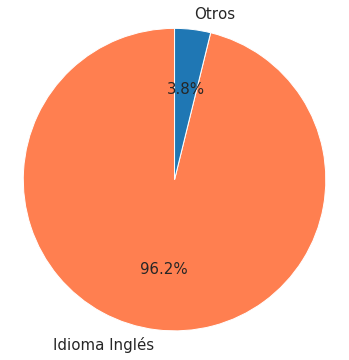

In [49]:
en_count = language_count.loc[language_count['Idioma']=='en','Cantidad']
others_count  = language_count.loc[language_count['Idioma']!='en','Cantidad'].sum()


labels = 'Idioma Inglés', 'Otros'
sizes = [en_count, others_count]
colors = ('coral','#1f77b4' )

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, textprops={'fontsize': 15}, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()